<a href="https://colab.research.google.com/github/tommy-hartanto/personal-projects/blob/main/Analysis_of_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Personal/Real estate.csv')

In [ ]:
df.sample(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
286,287,2012.917,5.9,90.45606,9,24.97433,121.54310,56.3
350,351,2013.000,13.2,492.23130,5,24.96515,121.53737,42.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**Description**

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle 
on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

#Data Preparation

## Rename Columns

In [ ]:
df.drop('No', inplace=True, axis=1)
df.columns = ['date', 'age', 'dist_mrt', 'num_stores', 'lat', 'long', 'price']
df.columns

Index(['date', 'age', 'dist_mrt', 'num_stores', 'lat', 'long', 'price'], dtype='object')

In [ ]:
df['date'].value_counts()

2013.417    58
2013.500    47
2013.083    46
2012.917    38
2013.250    32
2012.833    31
2012.667    30
2013.333    29
2013.000    28
2012.750    27
2013.167    25
2013.583    23
Name: date, dtype: int64

There are 126 data in total with 23-58 data per 12 checkpoints.

# Analysis

## Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



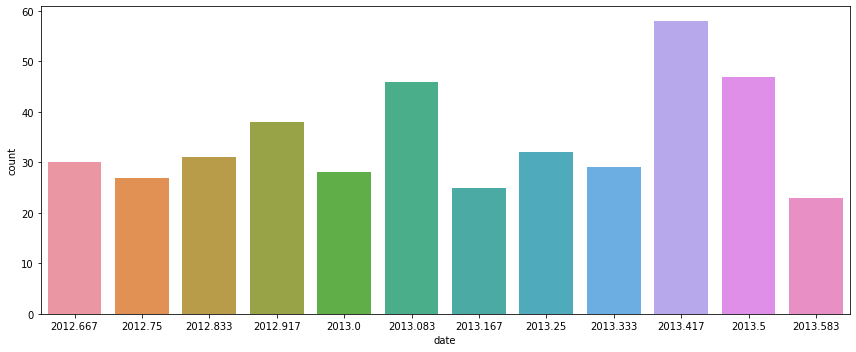

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df['date'])
plt.tight_layout()

- There was no clear uptrend in sales volume.
- Three checkpoints had considerably better period of selling. What happened during these times needs inspection.

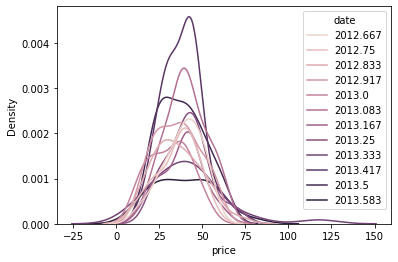

In [ ]:
sns.kdeplot(data=df, x='price', hue='date')

Each checkpoints has normal price distribution, thus mean may represent the whole.

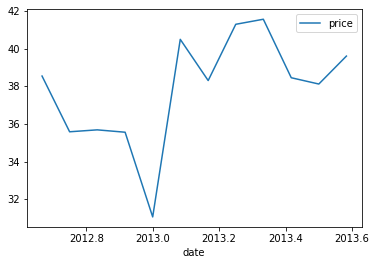

In [ ]:
df_price = df.groupby('date').agg({'price':'mean'})
df_price.plot()

There was an uptrend in sales volume, although not very consistent.

## Location

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df,lat='lat',lon='long')
fig.update_layout(title = 'Sold Houses 2012', title_x=0.5)
fig.show()

Apparently all of the sold houses were in Taipei, Taiwan. With regards to lack of data, I won't divide them any futher.

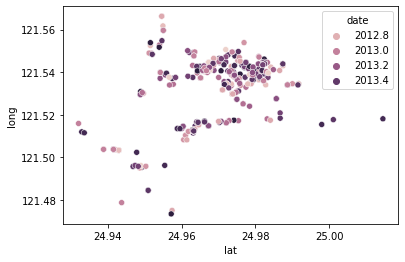

In [ ]:
sns.scatterplot(data=df, x='lat', y='long', hue='date')

There is also no visual pattern derivable based on location and time.

## Distance to MRT

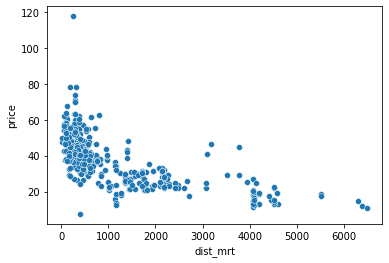

In [ ]:
sns.scatterplot(data=df, x='dist_mrt', y='price')

- There was an inverse relationship between distance to MRT and price.
- Most sold houses were within 3.000 m to MRT

## Age

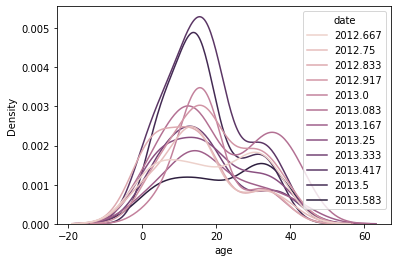

In [ ]:
sns.kdeplot(data=df, x='age', hue='date')

The sold houses could be segmented into 3 groups: 0-20 and 20-40, and above 40 years of age.

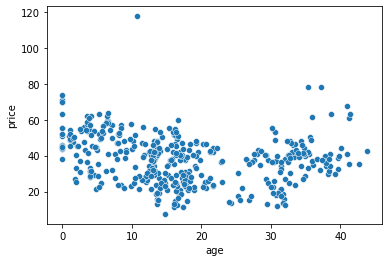

In [ ]:
sns.scatterplot(data=df, x='age', y='price')

There was no meaningful correlation between price and age.

House age relationships with location and other columns are not discussed because price was irrelevant and these relationships are not useful on how to improve business decisions.

## Number of stores

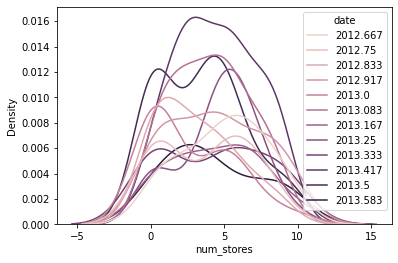

In [ ]:
sns.kdeplot(data=df, x='num_stores', hue='date')

The distribution is pretty normal, thus mean may be used to represent the whole as well.

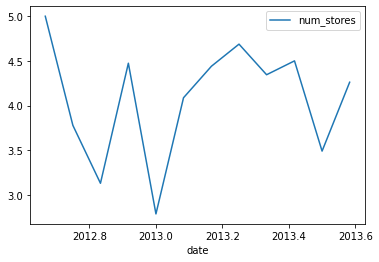

In [ ]:
df_stores = df.groupby('date').agg({'num_stores':'mean'})
df_stores.plot()

There was a downtrend in number of stores.

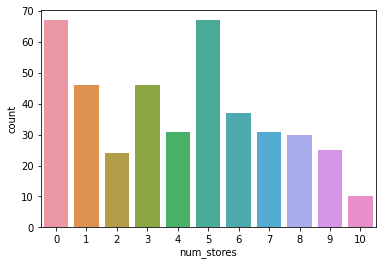

In [ ]:
sns.countplot(data=df, x='num_stores')

Segmenting the houses into 2 groups (less than five and five above) could be a useful segmentation.

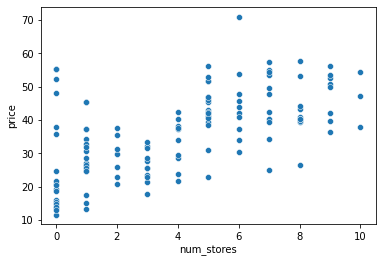

In [ ]:
sns.scatterplot(data=df_12, x='num_stores', y='price')

There was a positive correlation between price and number of stores around.

## Bigger picture

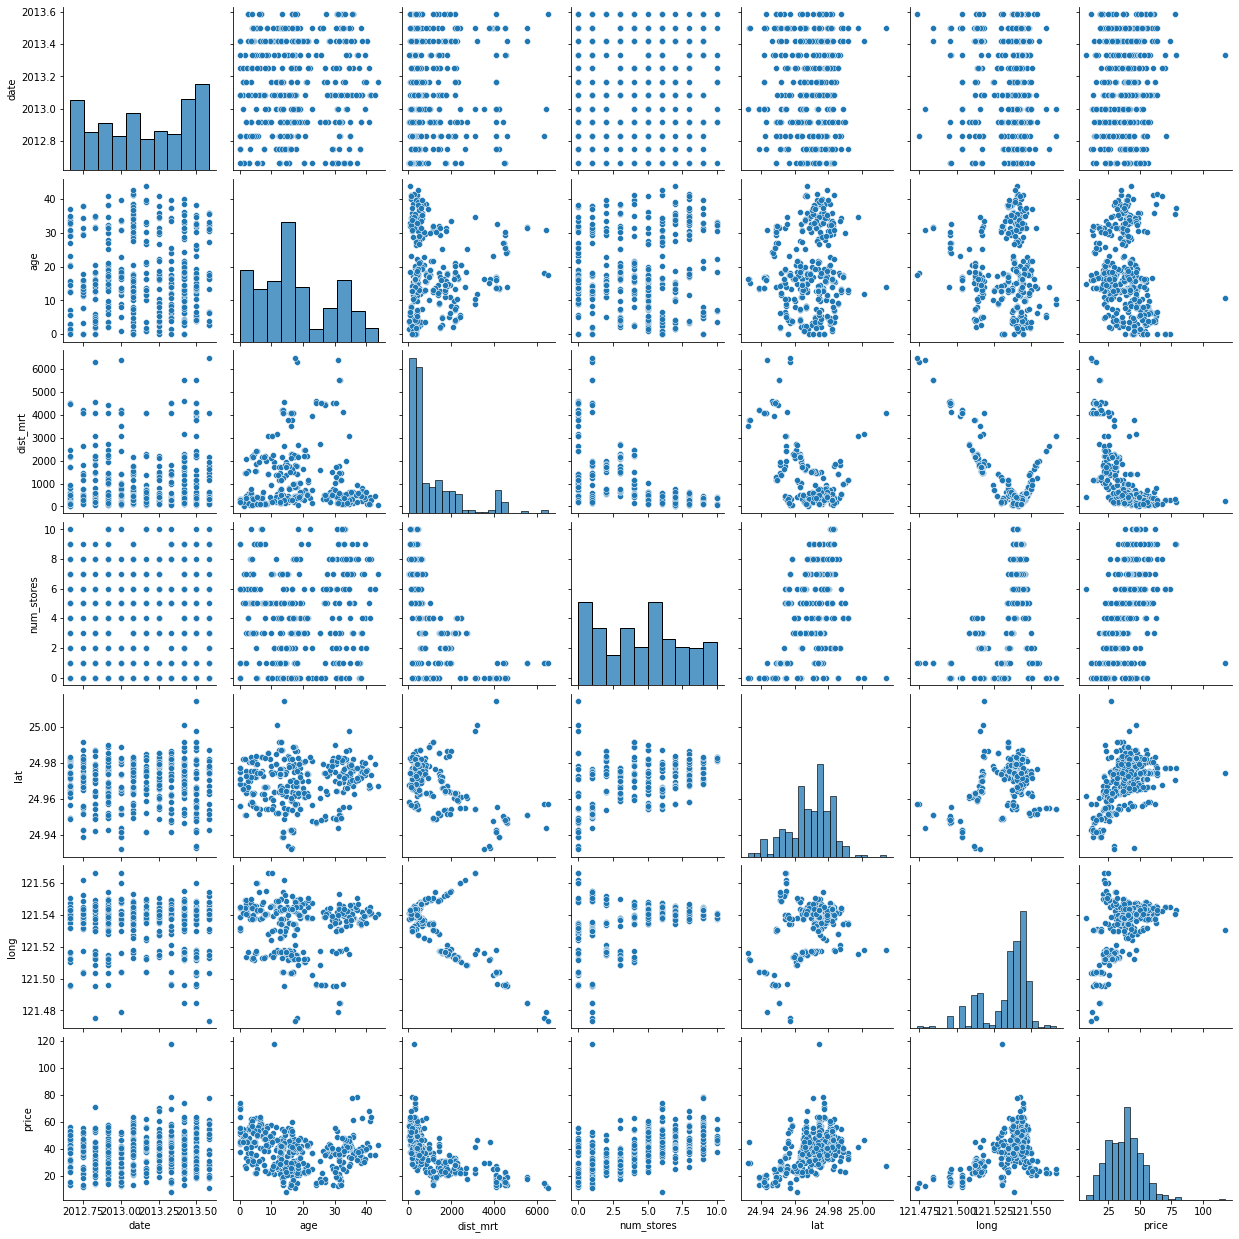

In [ ]:
sns.pairplot(df)

- There was a concentrated location/ neighborhood of higher house prices sold that were related with previous findings.

# Business Recommendations

- List houses that are:
 - surrounded by more than five stores;
 - less than 3.000 m to the closest MRT station; and
 - less than 20 years old.
- In simpler words, just focus the houses in that specific neighborhood because they tend to have all of the above.
- Sell stronger within the first half of year.